In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import os


In [44]:
# Set dataset directory path
dataset_dir = "C:/Users/HP/Desktop/Sem3/CS501_Minor Project/Soil types"

# Image size for CNN input
image_size = (150, 150)
batch_size = 32

# ImageDataGenerator for training and validation datasets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training data
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation data
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Class labels (soil types)
class_labels = train_generator.class_indices
print("Class labels:", class_labels)


Found 126 images belonging to 5 classes.
Found 30 images belonging to 5 classes.
Class labels: {'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [45]:
from tensorflow.keras import regularizers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels), activation='softmax')  # Number of classes as output
])

# Compile the model with learning rate scheduling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,039,173 (72.63 MB)

 Trainable params: 19,037,701 (72.62 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [46]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10  # Adjust epochs as needed
)


Epoch 1/10


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4038 - loss: 3.4635 - val_accuracy: 0.1667 - val_loss: 3.1041
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accuracy: 0.6250 - loss: 2.4807 - val_accuracy: 0.1667 - val_loss: 2.8583
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7426 - loss: 1.8338 - val_accuracy: 0.2333 - val_loss: 2.8883
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.7812 - loss: 1.8023 - val_accuracy: 0.3333 - val_loss: 2.9872
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8555 - loss: 1.6890 - val_accuracy: 0.3667 - val_loss: 3.5574
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.8333 - loss: 2.0101 - val_accuracy: 0.4000 - val_loss: 3.7272
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9092 - loss: 1.6564 - val_accuracy: 0.3333 - val_loss: 5.0950
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.8438 - loss: 1.7760 - val_accuracy: 0.3000 - val_loss: 5.6396
Epoch 9/10
3/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.2333 - loss: 8.2478
Validation Accuracy: 23.33%


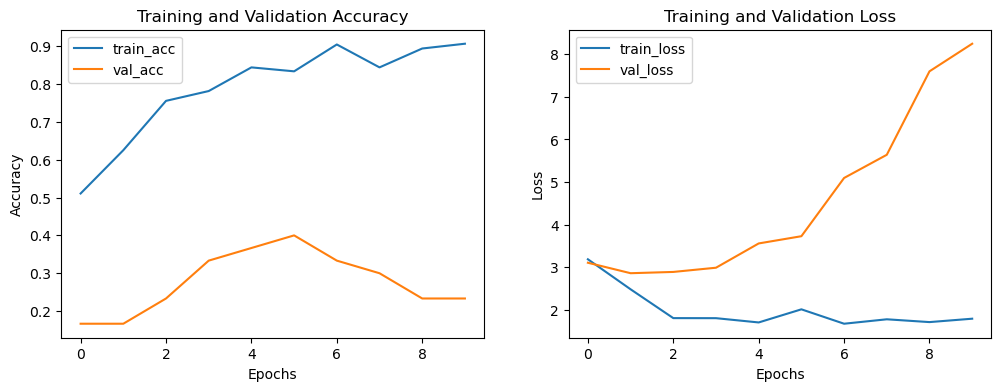

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
Confusion Matrix
[[7 0 0 0 0]
 [6 0 0 0 0]
 [6 0 0 0 0]
 [6 0 0 0 0]
 [5 0 0 0 0]]
Classification Report
               precision    recall  f1-score   support

   Black Soil       0.23      1.00      0.38         7
  Cinder Soil       0.00      0.00      0.00         6
Laterite Soil       0.00      0.00      0.00         6
    Peat Soil       0.00      0.00      0.00         6
  Yellow Soil       0.00      0.00      0.00         5

     accuracy                           0.23        30
    macro avg       0.05      0.20      0.08        30
 weighted avg       0.05      0.23      0.09        30



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# Evaluate model performance
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Classification report and confusion matrix
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = list(class_labels.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


In [55]:
from tensorflow.keras.preprocessing import image

def recommend_crops(soil_image_path):
    img = image.load_img(soil_image_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict soil type
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    
    # Get soil type and standardize the label
    soil_type = list(class_labels.keys())[predicted_class[0]].strip().lower()
    
    # Standardize the keys in crops_dict to match soil_type
    crops_dict = {
        'black soil': ['Cotton', 'Groundnut', 'Wheat'],
        'cinder soil': ['Potato', 'Wheat'],
        'laterite soil': ['Cashew', 'Coconut', 'Tea'],
        'peat soil': ['Rice', 'Sugarcane'],
        'yellow soil': ['Pulses', 'Peanuts', 'Cotton']
    }
    
    recommended_crops = crops_dict.get(soil_type, "No crops available")
    print(f"Predicted Soil Type: {soil_type.title()}")
    print(f"Recommended Crops: {recommended_crops}")
    
# Test the function
soil_image_path = "C:/Users/HP/Desktop/Sem3/CS501_Minor Project/Soil types/Cinder Soil/18.jpg"  # Replace with actual path
recommend_crops(soil_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Soil Type: Black Soil
Recommended Crops: ['Cotton', 'Groundnut', 'Wheat']


In [52]:
# Save the trained model
model.save('soil_crop_recommendation_model.h5')

# To load the model again for later use
# loaded_model = models.load_model('soil_crop_recommendation_model.h5')
